In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv(r'data/derived/Pleiades_df.csv')


In [19]:
roads_df = df[df['Place_Type']=='[\'road\']']
roads_df = roads_df.drop(columns = ['long', 'lat', 'Place_Type']) ## These col's are redundant

In [20]:
## To deal with duplicates lets remove id and Title and then filter
roads_df = roads_df.drop(columns = ['id', 'Title'])
roads_df = roads_df.drop_duplicates().dropna()

In [83]:
road_test = roads_df.iloc[39]

In [84]:
coords = road_test['Coords_List']
print(coords)

[[12.4873295, 41.891654], [12.4873529, 41.8916289], [12.4873687, 41.8916153], [12.4875212, 41.8915621], [12.4876939, 41.8915035], [12.4877523, 41.8914796], [12.4877921, 41.8914618], [12.4878375, 41.8914416], [12.4878703, 41.8914256], [12.4878989, 41.8914092], [12.4879294, 41.8913917], [12.4879535, 41.8913767], [12.4879931, 41.8913482], [12.4880322, 41.8913189], [12.4880568, 41.8912978], [12.4881058, 41.8912568], [12.4881564, 41.8912101], [12.4881739, 41.8911976], [12.4881938, 41.8911835], [12.4882176, 41.8911665], [12.4882588, 41.8911372], [12.4883007, 41.8911153], [12.488341, 41.8910881], [12.4883565, 41.8910593], [12.4883728, 41.8910248], [12.4884035, 41.8909914], [12.4884588, 41.8909534], [12.4885328, 41.8909093], [12.4885765, 41.8908818], [12.4885844, 41.8908141], [12.4885724, 41.8907612], [12.4885191, 41.8906913]]


In [85]:

coords = re.sub('[\[\] ]', '', coords)
coords = [float(number) for number in coords.split(',')]
print(coords)

[12.4873295, 41.891654, 12.4873529, 41.8916289, 12.4873687, 41.8916153, 12.4875212, 41.8915621, 12.4876939, 41.8915035, 12.4877523, 41.8914796, 12.4877921, 41.8914618, 12.4878375, 41.8914416, 12.4878703, 41.8914256, 12.4878989, 41.8914092, 12.4879294, 41.8913917, 12.4879535, 41.8913767, 12.4879931, 41.8913482, 12.4880322, 41.8913189, 12.4880568, 41.8912978, 12.4881058, 41.8912568, 12.4881564, 41.8912101, 12.4881739, 41.8911976, 12.4881938, 41.8911835, 12.4882176, 41.8911665, 12.4882588, 41.8911372, 12.4883007, 41.8911153, 12.488341, 41.8910881, 12.4883565, 41.8910593, 12.4883728, 41.8910248, 12.4884035, 41.8909914, 12.4884588, 41.8909534, 12.4885328, 41.8909093, 12.4885765, 41.8908818, 12.4885844, 41.8908141, 12.4885724, 41.8907612, 12.4885191, 41.8906913]


In [91]:
lons = coords[::2]
lats = coords[1::2]



TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [78]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


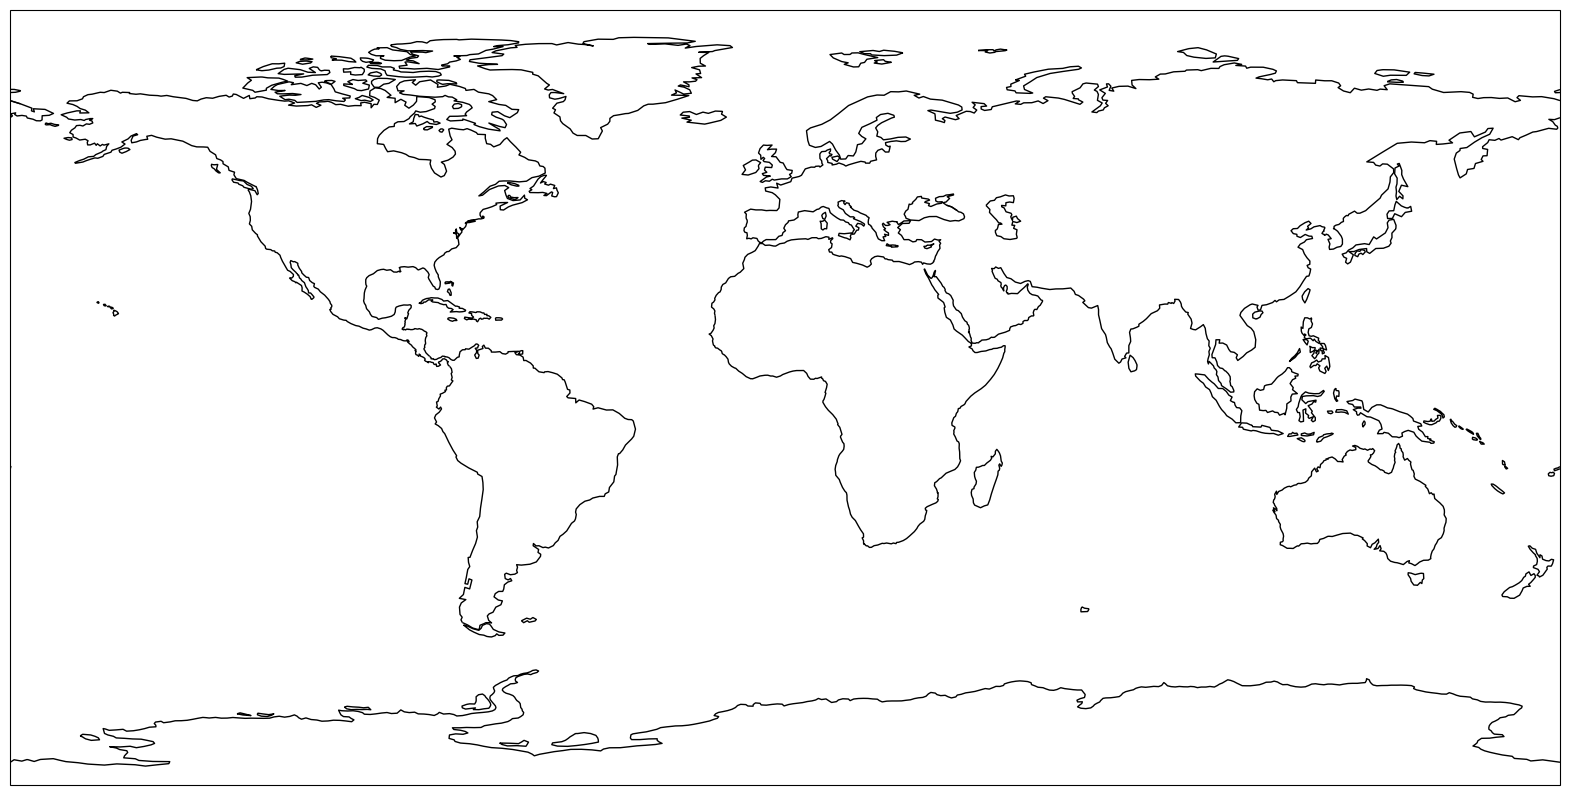

In [93]:

# Create a new figure with a Mercator projection
plt.figure(figsize=(20, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines()

sc = ax.plot(lons, lats, 'b-', transform=ccrs.PlateCarree())
sc = ax.plot([lon+1 for lon in lons], [lat+1 for lat in lats], 'r-', transform=ccrs.PlateCarree())
# # Add colorbar
# plt.colorbar(sc, label='Start Dates')

# Show the plot
plt.show()